In [83]:
from __future__ import print_function
from IPython.display import display, clear_output
import sys, os
import time
import math
import getdist.plots as gplot
from sympy import *
from sympy.solvers import solve
from scipy import optimize
from scipy.constants import physical_constants
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
from matplotlib import pyplot as plt
import scipy.integrate as integrate
import numpy as np

init_vprinting()

# Stability analysis for a universe: Matter+Radiation+$\Lambda$

In [116]:
Omega_m, Omega_r, Omega_l = symbols('\Omega_{M} \Omega_{R} \Omega_{\Lambda}')

Omega_m_p = Function('\Omega_{M}^{\prime}')
Omega_r_p = Function('\Omega_{R}^{\prime}')

Omega_m_p = Omega_m * (3*Omega_m + 4*Omega_r - 3)
Omega_r_p = Omega_r * (3*Omega_m + 4*Omega_r - 4)

w_eff = Symbol('w_{eff}')
w_m = Symbol('w_{M}')
w_r = Symbol('w_{R}')
w_l = Symbol('w_{\Lambda}')

w_eff = w_m*Omega_m + w_r*Omega_r + w_l*Omega_l

### Effective EoS Parameter $w_{eff}$

In [122]:
def w_effective(Or, Ol):
    return Or/3.0 - Ol

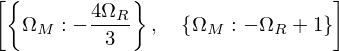

In [85]:
solve([Omega_m_p + Omega_r_p], Omega_m, Omega_r)

### Critical Points

$\left(\Omega_{M}, \Omega_{R}\right) = (0,0) \ \rightarrow\ \Lambda\ \text{dominated}$

$\left(\Omega_{M}, \Omega_{R}\right) = (0,1)\ \rightarrow\ \text{Radiation dominated}$

$\left(\Omega_{M}, \Omega_{R}\right) = (1,0)\ \rightarrow\ \text{Matter dominated}$

In [86]:
Jacobian = Matrix([[diff(Omega_m_p, Omega_m),diff(Omega_m_p, Omega_r)],[diff(Omega_r_p, Omega_m), diff(Omega_r_p, Omega_r)]])

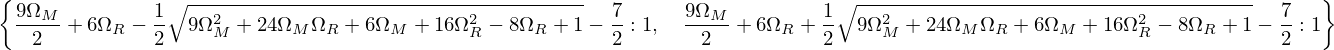

In [108]:
Jacobian.eigenvals()

In [109]:
def eig_vals(Omega_M, Omega_R):
    eig1 = 9*Omega_M/2 + 6*Omega_R - np.sqrt(9*Omega_M**2 + 24*Omega_M*Omega_R + 6*Omega_M + 16*Omega_R**2 - 8*Omega_R + 1)/2 - 7/2
    eig2 = 9*Omega_M/2 + 6*Omega_R + np.sqrt(9*Omega_M**2 + 24*Omega_M*Omega_R + 6*Omega_M + 16*Omega_R**2 - 8*Omega_R + 1)/2 - 7/2
    
    return [eig1, eig2]

M_eigs = eig_vals(1,0)
R_eigs = eig_vals(0,1)
L_eigs = eig_vals(0,0)

### Eigenvalues for the critical point M(1,0)

In [110]:
M_eigs

M(1,0) $\rightarrow$ Saddle point

In [125]:
w_effective(0,0)

### Eigenvalues for the critical point R(0,1)

In [111]:
R_eigs

R(0,1) $\rightarrow$ Unstable (past time attractor) 

In [128]:
w_effective(1,0)

### Eigenvalues for the critical point $\Lambda(0,0)$

In [112]:
L_eigs

$\Lambda$(0,0) $\rightarrow$ Stable (attractor - future time attractor)

In [130]:
w_effective(0,1)

# Stability analysis for a universe with Barotropic fluid and Quintessence